In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
import seaborn as sns

In [2]:
health_final = pd.read_csv('..\data\health_final.csv')

In [3]:
locations = pd.read_csv('..\data\location_region_division.csv')

In [4]:
locations=locations.rename(columns = {'region_x':'state', 
                                     'name_x':'brewery'})

In [5]:
health_final=health_final.rename(columns = {'5-digit_fips_code':'fips_code'})

In [6]:
crosswalk = pd.read_csv('..\\data\\uscities.csv', 
                       usecols= ['city', 'state_id', 'state_name', 'county_fips', 'county_name'])

In [7]:
us_country = gpd.read_file('../data/gz_2010_us_040_00_5m.json')

In [8]:
region_division = pd.read_csv('..\data\\region_division.csv',
                             usecols=['REGION','DIVISION', 'NAME'])

In [9]:
crosswalk.columns = crosswalk.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [10]:
# # merge both df so region and division are added
# location_final = pd.merge(locations, region_division, left_on='region', right_on='name')

In [11]:
# geo_locations = gpd.GeoDataFrame(
#     locations, geometry=gpd.points_from_xy(locations.longitude, locations.latitude))

In [12]:
region_map = {
    '1': 'Northeast',
    '2': 'Midwest',
    '3': 'South',
    '4': 'West',
    'X': 'Undefined'
}

In [13]:
division_map = {
    '1': 'New England',
    '2': 'Middle Atlantic',
    '3': 'East North Central',
    '4': 'West North Central',
    '5': 'South Atlantic',
    '6': 'East South Central',
    '7': 'West South Central',
    '8': 'Mountain',
    '9': 'Pacific',
    'X': 'Undefined'
}

In [14]:
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'US': 'United States',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

In [15]:
# Add word county to make it possible to merge names 
crosswalk['county_name'] = crosswalk['county_name'].astype(str) + ' County'

In [16]:
crosswalk.head()

,city,state_id,state_name,county_fips,county_name
0,South Creek,WA,Washington,53053,Pierce County
1,Roslyn,WA,Washington,53037,Kittitas County
2,Sprague,WA,Washington,53043,Lincoln County
3,Gig Harbor,WA,Washington,53053,Pierce County
4,Lake Cassidy,WA,Washington,53061,Snohomish County


In [17]:
crosswalk[(crosswalk.city == 'Greenland') & (crosswalk.state_name == 'Michigan')]

,city,state_id,state_name,county_fips,county_name


In [18]:
crosswalk.head(3)

,city,state_id,state_name,county_fips,county_name
0,South Creek,WA,Washington,53053,Pierce County
1,Roslyn,WA,Washington,53037,Kittitas County
2,Sprague,WA,Washington,53043,Lincoln County


In [19]:
# This merge results in a 10% loss of data
loc_cross = pd.merge(locations, crosswalk, left_on=['locality', 'state'], right_on=['city', 'state_name'], how='inner')

In [20]:
loc_cross.head(3)

,id,brewery,streetAddress,locality,state,postalCode,latitude,longitude,locationTypeDisplay,countryIsoCode,brewery.isMassOwned,us_region,us_division,geometry,city,state_id,state_name,county_fips,county_name
0,udRaBO,(Closed) Boulder Beer on Walnut,1123 Walnut St,Boulder,Colorado,80302,40.016871,-105.280436,Brewpub,US,N,West,Mountain,POINT (-105.2804358 40.0168706),Boulder,CO,Colorado,8013,Boulder County
1,pvSIT8,Adamant Brewing Company,1001 Lee Hill Drive,Boulder,Colorado,80302,40.062969,-105.284195,Micro Brewery,US,N,West,Mountain,POINT (-105.2841948 40.06296879999999),Boulder,CO,Colorado,8013,Boulder County
2,SXn3sZ,Avery Brewing Co.,4910 Nautilus Court North,Boulder,Colorado,80301,40.062531,-105.204787,Micro Brewery,US,N,West,Mountain,POINT (-105.2047868 40.0625314),Boulder,CO,Colorado,8013,Boulder County


In [21]:
# There are some nan values in the county_fips column
# loc_cross['county_fips'] = loc_cross['county_fips'].replace('nan', '')

In [22]:
# There are some nan values in the county_fips column
# loc_cross['county_fips'] = loc_cross['county_fips'].fillna(0)

In [23]:
# loc_cross[loc_cross.county_fips == 0].head(25)

In [24]:
loc_cross.county_fips = loc_cross.county_fips.astype(str)

In [25]:
loc_cross.county_fips = loc_cross.county_fips[:-2]

In [26]:
loc_cross.head()

,id,brewery,streetAddress,locality,state,postalCode,latitude,longitude,locationTypeDisplay,countryIsoCode,brewery.isMassOwned,us_region,us_division,geometry,city,state_id,state_name,county_fips,county_name
0,udRaBO,(Closed) Boulder Beer on Walnut,1123 Walnut St,Boulder,Colorado,80302,40.016871,-105.280436,Brewpub,US,N,West,Mountain,POINT (-105.2804358 40.0168706),Boulder,CO,Colorado,8013,Boulder County
1,pvSIT8,Adamant Brewing Company,1001 Lee Hill Drive,Boulder,Colorado,80302,40.062969,-105.284195,Micro Brewery,US,N,West,Mountain,POINT (-105.2841948 40.06296879999999),Boulder,CO,Colorado,8013,Boulder County
2,SXn3sZ,Avery Brewing Co.,4910 Nautilus Court North,Boulder,Colorado,80301,40.062531,-105.204787,Micro Brewery,US,N,West,Mountain,POINT (-105.2047868 40.0625314),Boulder,CO,Colorado,8013,Boulder County
3,A1BCFu,BJ's Restaurant and Brewhouse,1690 28th St,Boulder,Colorado,80301,40.017753,-105.257814,Brewpub,US,N,West,Mountain,POINT (-105.2578141 40.0177527),Boulder,CO,Colorado,8013,Boulder County
4,ZqnBtw,Boco Cider,1501 Lee Hill Dr.,Boulder,Colorado,80304,40.062625,-105.278768,Cidery,US,N,West,Mountain,POINT (-105.2787675 40.06262460000001),Boulder,CO,Colorado,8013,Boulder County


In [27]:
loc_cross.us_region.value_counts()

West         2306
South        1653
Midwest      1618
Northeast     885
Name: us_region, dtype: int64

In [28]:
loc_cross.us_division.value_counts()

Pacific               1472
East North Central    1164
South Atlantic        1070
Mountain               834
Middle Atlantic        684
West North Central     454
West South Central     386
New England            201
East South Central     197
Name: us_division, dtype: int64

In [29]:
# DF showing no matches. Using this to show loss of data
loc_nan = pd.merge(locations, crosswalk, left_on=['locality', 'state'], right_on=['city', 'state_name'], how='left')

In [30]:
loc_nan.us_region.value_counts()

West         2396
South        1764
Midwest      1719
Northeast    1320
Name: us_region, dtype: int64

In [31]:
loc_nan.us_division.value_counts()

Pacific               1541
East North Central    1213
South Atlantic        1158
Mountain               855
Middle Atlantic        842
West North Central     506
New England            478
West South Central     403
East South Central     203
Name: us_division, dtype: int64

In [32]:
loc_cross.head(2)

,id,brewery,streetAddress,locality,state,postalCode,latitude,longitude,locationTypeDisplay,countryIsoCode,brewery.isMassOwned,us_region,us_division,geometry,city,state_id,state_name,county_fips,county_name
0,udRaBO,(Closed) Boulder Beer on Walnut,1123 Walnut St,Boulder,Colorado,80302,40.016871,-105.280436,Brewpub,US,N,West,Mountain,POINT (-105.2804358 40.0168706),Boulder,CO,Colorado,8013,Boulder County
1,pvSIT8,Adamant Brewing Company,1001 Lee Hill Drive,Boulder,Colorado,80302,40.062969,-105.284195,Micro Brewery,US,N,West,Mountain,POINT (-105.2841948 40.06296879999999),Boulder,CO,Colorado,8013,Boulder County


In [33]:
loc_cross.shape

(6462, 19)

In [34]:
health_final.head(2)

,state_fips_code,county_fips_code,fips_code,state_abbreviation,county,adult_smoking_raw_value,adult_obesity_raw_value,excessive_drinking_raw_value,alcohol-impaired_driving_deaths_raw_value,some_college_raw_value,...,violent_crime_raw_value,life_expectancy_raw_value,drug_overdose_deaths_raw_value,insufficient_sleep_raw_value,median_household_income_raw_value,suicides_raw_value,population_raw_value,state,region,division
0,0,0,0,US,United States,0.170800,0.290,0.189771,0.277641,0.657241,...,386.464896,79.089130,20.618144,0.33895,61937.0,13.580564,327167434,United States,NaN,NaN
1,1,0,1000,AL,Alabama,0.209274,0.355,0.139035,0.275892,0.604119,...,479.919182,75.416194,16.176762,0.37721,49881.0,15.638260,4887871,Alabama,South,East South Central


In [35]:
health_final['fips_code'] = health_final['fips_code'].astype(str)

In [36]:
final_df = pd.merge(loc_cross, health_final, left_on='county_fips', right_on='fips_code', how='left')

In [37]:
final_df.shape

(6462, 40)

In [38]:
final_df = final_df.drop(columns='geometry', axis=1)

In [39]:
geo_final = gpd.GeoDataFrame(
    final_df, geometry=gpd.points_from_xy(final_df.longitude, final_df.latitude))

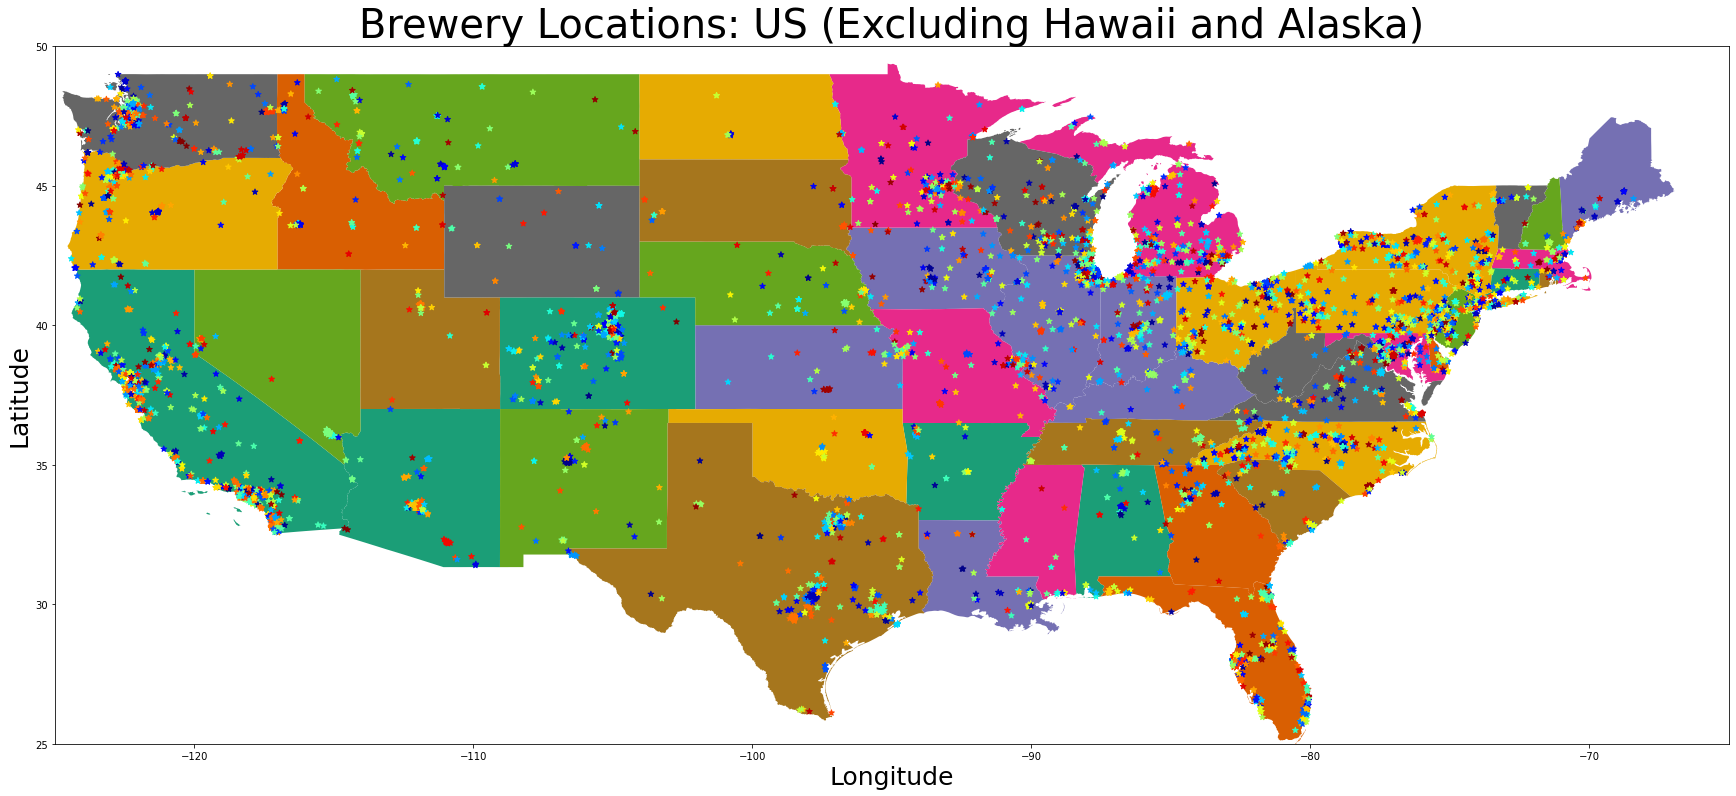

In [40]:
# Plotting to see the hurricane overlay the US map:
fig, ax = plt.subplots(1, figsize=(30,20))
base = us_country.plot(ax=ax, column = 'STATE', cmap='Dark2')
plt.xlim(-125, -65)
plt.ylim(25, 50)
plt.title('Brewery Locations: US (Excluding Hawaii and Alaska)', loc='center', fontsize=40)
plt.xlabel('Longitude', fontsize = 25)
plt.ylabel('Latitude', fontsize = 25)
# plotting locations over states
geo_final.plot(ax=base, column=final_df.locality, marker="*", legend=False, cmap='jet')


In [41]:
# Find number of losses after the merge
division_loss = loc_cross.us_division.value_counts().sub(loc_nan.us_division.value_counts(), fill_value=0).sort_values()
division_loss = pd.DataFrame(division_loss).reset_index()
division_loss.columns = ['Division', 'Number Lost']
division_loss

,Division,Number Lost
0,New England,-277
1,Middle Atlantic,-158
2,South Atlantic,-88
3,Pacific,-69
4,West North Central,-52
5,East North Central,-49
6,Mountain,-21
7,West South Central,-17
8,East South Central,-6


In [42]:
# Percentage lost in us divisions after merge
division_perc = (((loc_cross.us_division.value_counts().sub(loc_nan.us_division.value_counts(), fill_value=0))/loc_nan.us_division.value_counts())*100).sort_values()
division_perc = pd.DataFrame(division_perc).reset_index()
division_perc.columns = ['Division', 'Percent Lost']
division_perc

,Division,Percent Lost
0,New England,-57.949791
1,Middle Atlantic,-18.764846
2,West North Central,-10.276680
3,South Atlantic,-7.599309
4,Pacific,-4.477612
5,West South Central,-4.218362
6,East North Central,-4.039571
7,East South Central,-2.955665
8,Mountain,-2.456140


In [43]:
division_perc['Percent Lost'] = division_perc['Percent Lost'].round(2)
division_perc['Percent Lost'] = division_perc['Percent Lost'].astype(str) + '%'

In [44]:
# Find number of region losses after the merge
region_loss = loc_cross.us_region.value_counts().sub(loc_nan.us_region.value_counts(), fill_value=0).sort_values()
region_loss = pd.DataFrame(region_loss).reset_index()
region_loss.columns = ['Region', 'Number Lost']
region_loss

,Region,Number Lost
0,Northeast,-435
1,South,-111
2,Midwest,-101
3,West,-90


In [45]:
# Different method using sub
# loc_cross.us_region.value_counts().sub(loc_nan.us_region.value_counts(), fill_value=0)/loc_cross.us_region.value_counts()*100


In [46]:
# Percentage lost in us regions after merge
region_perc = (((loc_cross.us_region.value_counts() - loc_nan.us_region.value_counts())/loc_nan.us_region.value_counts())*100).sort_values()
region_perc = pd.DataFrame(region_perc).reset_index()
region_perc.columns = ['Region', 'Percent Lost']
region_perc

,Region,Percent Lost
0,Northeast,-32.954545
1,South,-6.292517
2,Midwest,-5.875509
3,West,-3.756260


In [47]:
region_perc['Percent Lost'] = region_perc['Percent Lost'].round(2)
region_perc['Percent Lost'] = region_perc['Percent Lost'].astype(str) + '%'

**Convert DFs into tables for PowerPoint**

In [48]:
# Division Losses
def df_table(df):
    fig, ax = plt.subplots()
    # hide axes
    fig.patch.set_visible(False)
    ax.axis('off')
    ax.axis('tight')
    ax.table(cellText=df.values, colLabels=df.columns, loc='center')
    fig.tight_layout()
    fig.canvas.draw()

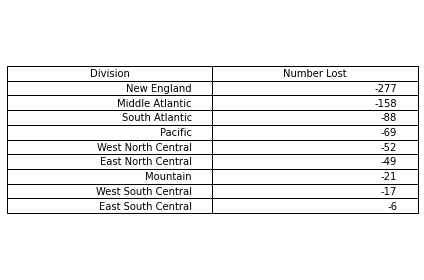

In [49]:
# Division Losses
df_table(division_loss)
plt.savefig("../data/division_loss.png")

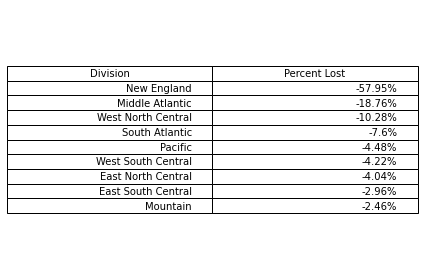

In [50]:
# Division Percents
df_table(division_perc)
plt.savefig("../data/division_perc.png")

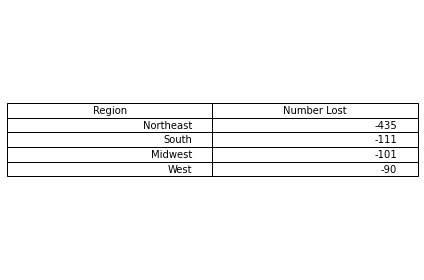

In [51]:
# Region Losses
df_table(region_loss)
plt.savefig("../data/region_loss.png")

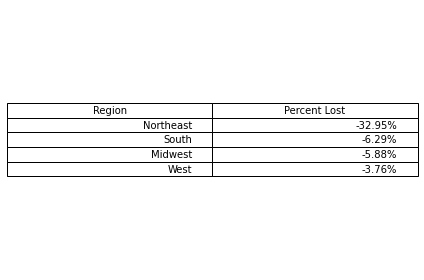

In [52]:
# Region percents
df_table(region_perc)
plt.savefig("../data/region_perc.png")

In [53]:
# (loc_cross.us_region.value_counts() - loc_nan.us_region.value_counts())

In [54]:
# final_df.groupby('region')['life_expectancy_raw_value'].mean().sort_values()

In [55]:
final_df.head(1)

,id,brewery,streetAddress,locality,state_x,postalCode,latitude,longitude,locationTypeDisplay,countryIsoCode,...,life_expectancy_raw_value,drug_overdose_deaths_raw_value,insufficient_sleep_raw_value,median_household_income_raw_value,suicides_raw_value,population_raw_value,state_y,region,division,geometry
0,udRaBO,(Closed) Boulder Beer on Walnut,1123 Walnut St,Boulder,Colorado,80302,40.016871,-105.280436,Brewpub,US,...,82.969309,12.051692,0.234431,83591.0,17.133172,326078.0,Colorado,West,Mountain,POINT (-105.28044 40.01687)


In [56]:
# Rename before saving
final_df=final_df.rename(columns = {'state_x':'state', 
                                   'locationTypeDisplay':'brewery_type',
                                   'brewery.isMassOwned': 'massOwned',
                                   'adult_smoking_raw_value': 'adult_smoking',
                                   'excessive_drinking_raw_value':'excessive_drinking',
                                   'alcohol-impaired_driving_deaths_raw_value': 'alcohol_impaired_driving_deaths',
                                   'violent_crime_raw_value': 'violent_crime',
                                   'life_expectancy_raw_value':'life_expectancy',
                                   'drug_overdose_deaths_raw_value':'drug_overdose_deaths',
                                   'insufficient_sleep_raw_value':'insufficient_sleep',
                                   'median_household_income_raw_value': 'median_household_income',
                                    'income_inequality_raw_value': 'income_inequality',
                                   'suicides_raw_value':'suicide',
                                    'some_college_raw_value': 'some_college',
                                    'adult_obesity_raw_value': 'adult_obesity',
                                   'population_raw_value': 'population'})

In [57]:
final_df.columns

Index(['id', 'brewery', 'streetAddress', 'locality', 'state', 'postalCode',
       'latitude', 'longitude', 'brewery_type', 'countryIsoCode', 'massOwned',
       'us_region', 'us_division', 'city', 'state_id', 'state_name',
       'county_fips', 'county_name', 'state_fips_code', 'county_fips_code',
       'fips_code', 'state_abbreviation', 'county', 'adult_smoking',
       'adult_obesity', 'excessive_drinking',
       'alcohol_impaired_driving_deaths', 'some_college', 'income_inequality',
       'violent_crime', 'life_expectancy', 'drug_overdose_deaths',
       'insufficient_sleep', 'median_household_income', 'suicide',
       'population', 'state_y', 'region', 'division', 'geometry'],
      dtype='object')

['id', 'brewery', 'streetAddress', 'locality', 'state', 'postalCode',
       'latitude', 'longitude', 'brewery_type', 'countryIsoCode', 'massOwned',
       'us_region', 'us_division', 'city', 'state_id', 'state_name',
       'county_fips', 'county_name', 'state_fips_code', 'county_fips_code',
       'fips_code', 'state_abbreviation', 'county', 'adult_smoking',
       'excessive_drinking', 'alcohol_impaired_driving_deaths',
       'income_inequality', 'violent_crime', 'life_expectancy',
       'drug_overdose_deaths', 'insufficient_sleep', 'median_household_income',
       'suicide', 'population', 'state_y', 'region', 'division', 'geometry'],
      dtype='object')

In [58]:
# Drop redundant columns
final_df = final_df.drop(columns=['id', 'state_y'], axis=1)

In [59]:
# Get population as an int 
final_df['population'] = final_df['population'].astype('Int64')

In [60]:
grouped_state = (final_df.groupby(['state', 'region']) \
     .agg(
             {'brewery':'count',
#              'population': 'count',
             'adult_smoking': 'mean',
             'excessive_drinking': 'mean',
             'alcohol_impaired_driving_deaths':'mean',
             'income_inequality':'mean',
             'violent_crime':'mean',
             'life_expectancy':'mean',
             'drug_overdose_deaths':'mean',
             'insufficient_sleep':'mean',
             'median_household_income':'mean',
             'suicide':'mean',
             'some_college': 'mean',
             'adult_obesity': 'mean'})
     .reset_index() \
     .rename(columns={'brewery':'brewery_count'})) \
     .sort_values(by='brewery_count', ascending=0)

In [61]:
grouped_region = (final_df.groupby('region') \
     .agg(
             {'brewery':'count',
#              'population': 'count',
              'adult_smoking': 'mean',
             'excessive_drinking': 'mean',
             'alcohol_impaired_driving_deaths':'mean',
             'income_inequality':'mean',
             'violent_crime':'mean',
             'life_expectancy':'mean',
             'drug_overdose_deaths':'mean',
             'insufficient_sleep':'mean',
             'median_household_income':'mean',
             'suicide':'mean',
             'some_college': 'mean',
             'adult_obesity': 'mean'})
     .reset_index() \
     .rename(columns={'brewery':'brewery_count'})) \
     .sort_values(by='brewery_count', ascending=0)

In [62]:
grouped_division = (final_df.groupby('division') \
     .agg(
             {'brewery':'count',
             'adult_smoking': 'mean',
             'excessive_drinking': 'mean',
             'alcohol_impaired_driving_deaths':'mean',
             'income_inequality':'mean',
             'violent_crime':'mean',
             'life_expectancy':'mean',
             'drug_overdose_deaths':'mean',
             'insufficient_sleep':'mean',
             'median_household_income':'mean',
             'suicide':'mean',
             'some_college': 'mean',
             'adult_obesity': 'mean'})
     .reset_index() \
     .rename(columns={'brewery':'brewery_count'})) \
     .sort_values(by='brewery_count', ascending=0)

In [63]:
grouped_locality = (final_df.groupby(['locality', 'region']) \
     .agg(
             {'brewery':'count',
             'adult_smoking': 'mean',
             'excessive_drinking': 'mean',
             'alcohol_impaired_driving_deaths':'mean',
             'income_inequality':'mean',
             'violent_crime':'mean',
             'life_expectancy':'mean',
             'drug_overdose_deaths':'mean',
             'insufficient_sleep':'mean',
             'median_household_income':'mean',
             'suicide':'mean',
             'some_college': 'mean',
             'adult_obesity': 'mean'})
     .reset_index() \
     .rename(columns={'brewery':'brewery_count'})) \
     .sort_values(by='brewery_count', ascending=0)

In [64]:
grouped_fips = (final_df.groupby('fips_code') \
     .agg(
             {'brewery':'count',
             'adult_smoking': 'mean',
             'excessive_drinking': 'mean',
             'alcohol_impaired_driving_deaths':'mean',
             'income_inequality':'mean',
             'violent_crime':'mean',
             'life_expectancy':'mean',
             'drug_overdose_deaths':'mean',
             'insufficient_sleep':'mean',
             'median_household_income':'mean',
             'suicide':'mean',
             'some_college': 'mean',
             'adult_obesity': 'mean'})
     .reset_index() \
     .rename(columns={'brewery':'brewery_count'})) \
     .sort_values(by='brewery_count', ascending=0)

In [65]:
grouped_county_fips = (final_df.groupby('county_fips_code') \
     .agg(
             {'brewery':'count',
             'adult_smoking': 'mean',
             'excessive_drinking': 'mean',
             'alcohol_impaired_driving_deaths':'mean',
             'income_inequality':'mean',
             'violent_crime':'mean',
             'life_expectancy':'mean',
             'drug_overdose_deaths':'mean',
             'insufficient_sleep':'mean',
             'median_household_income':'mean',
             'suicide':'mean',
             'some_college': 'mean',
             'adult_obesity': 'mean'})
     .reset_index() \
     .rename(columns={'brewery':'brewery_count'})) \
     .sort_values(by='brewery_count', ascending=0)

In [66]:
grouped_county = (final_df.groupby(['county', 'region']) \
     .agg(
             {'brewery':'count',
             'adult_smoking': 'mean',
             'excessive_drinking': 'mean',
             'alcohol_impaired_driving_deaths':'mean',
             'income_inequality':'mean',
             'violent_crime':'mean',
             'life_expectancy':'mean',
             'drug_overdose_deaths':'mean',
             'insufficient_sleep':'mean',
             'median_household_income':'mean',
             'suicide':'mean',
             'some_college': 'mean',
             'adult_obesity': 'mean'})
     .reset_index() \
     .rename(columns={'brewery':'brewery_count'})) \
     .sort_values(by='brewery_count', ascending=0)

In [67]:
# test = (final_df.groupby(['state', 'locality', 'county_fips_code']) \
#      .agg(
#              {'brewery':'count',
# #              'population': 'count',
#              'excessive_drinking': 'mean',
#              'alcohol_impaired_driving_deaths':'mean',
#              'income_inequality_raw_value':'mean',
#              'violent_crime':'mean',
#              'life_expectancy':'mean',
#              'drug_overdose_deaths':'mean',
#              'insufficient_sleep':'mean',
#              'median_household_income':'mean',
#              'suicide':'mean'})
#      .reset_index() \
#      .rename(columns={'brewery':'brewery_count'})) \
#      .sort_values(by='brewery_count', ascending=0)

In [68]:
# Add word county to make it possible to merge names 
grouped_county_fips['county_fips_code'] = grouped_county_fips['county_fips_code'].astype('Int64')

In [69]:
# Denver county
grouped_county_fips[grouped_county_fips['county_fips_code'] == 31]

,county_fips_code,brewery_count,adult_smoking,excessive_drinking,alcohol_impaired_driving_deaths,income_inequality,violent_crime,life_expectancy,drug_overdose_deaths,insufficient_sleep,median_household_income,suicide,some_college,adult_obesity
19,31,277,0.146319,0.22674,0.342576,4.956639,521.409621,79.596169,21.904518,0.31271,65525.815884,13.866275,0.709849,0.241249


In [70]:
# # Saving DFs to CSVs
# final_df.to_csv("../data/final_df.csv", encoding='utf-8', index = False)
# grouped_region.to_csv("../data/grouped_region.csv", encoding='utf-8', index = False)
# grouped_division.to_csv("../data/grouped_division.csv", encoding='utf-8', index = False)
# grouped_state.to_csv("../data/grouped_state.csv", encoding='utf-8', index = False)
# grouped_fips.to_csv("../data/grouped_fips.csv", encoding='utf-8', index = False)
# grouped_locality.to_csv("../data/grouped_locality.csv", encoding='utf-8', index = False)
# grouped_county.to_csv("../data/grouped_county.csv", encoding='utf-8', index = False)


In [71]:
# Save percent/number lost


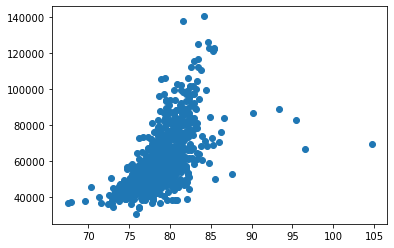

In [72]:
plt.scatter(grouped_county.life_expectancy, grouped_county.median_household_income)


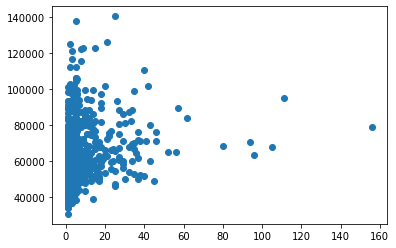

In [73]:
plt.scatter(grouped_county.brewery_count, grouped_county.median_household_income)

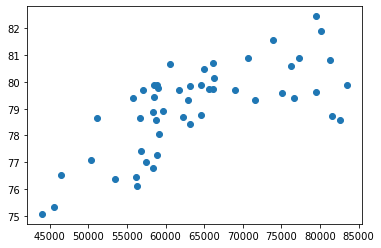

In [74]:
plt.scatter(grouped_state.median_household_income, grouped_state.life_expectancy)


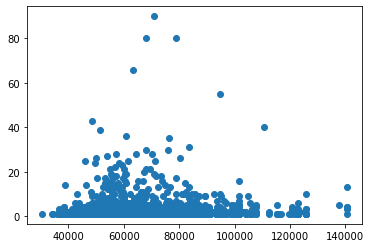

In [75]:
plt.scatter(grouped_locality.median_household_income, grouped_locality.brewery_count)


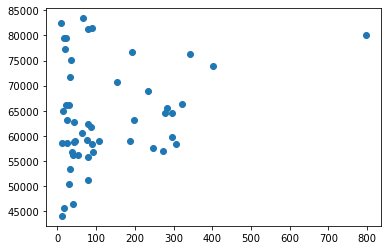

In [76]:
# Regions - Look at correlations between income and brewery count
plt.scatter(grouped_state.brewery_count, grouped_state.median_household_income)

Text(0.5, 0, 'Number of Breweries')

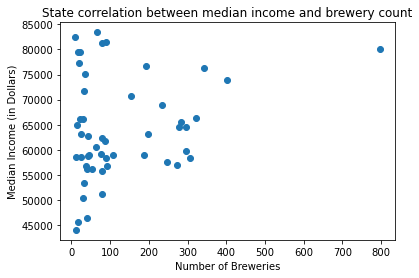

In [77]:
# States - Look at correlations between income and brewery count
plt.scatter(grouped_state.brewery_count, grouped_state.median_household_income)
plt.title('State correlation between median income and brewery count')
plt.ylabel('Median Income (in Dollars)')
plt.xlabel('Number of Breweries')

Text(0.5, 0, 'Number of Breweries')

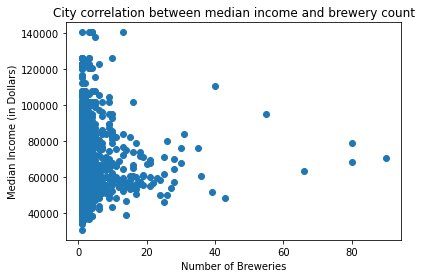

In [78]:
# Cities - Look at correlations between income and brewery count
plt.scatter(grouped_locality.brewery_count, grouped_locality.median_household_income)
plt.title('City correlation between median income and brewery count')
plt.ylabel('Median Income (in Dollars)')
plt.xlabel('Number of Breweries')

In [79]:
top_10_cities = grouped_locality.head(10)

In [80]:
top_10_states = grouped_state.head(10)

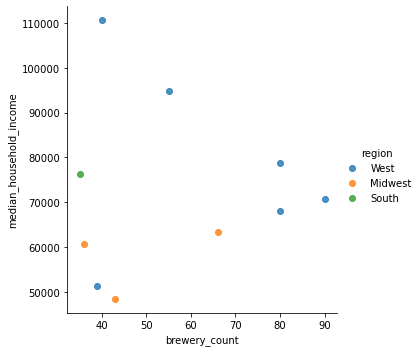

In [81]:
sns.lmplot('brewery_count', 'median_household_income', data=top_10_cities, hue='region', fit_reg=False)

In [82]:
top_10_cities.head()

,locality,region,brewery_count,adult_smoking,excessive_drinking,alcohol_impaired_driving_deaths,income_inequality,violent_crime,life_expectancy,drug_overdose_deaths,insufficient_sleep,median_household_income,suicide,some_college,adult_obesity
1841,Portland,West,90,0.159621,0.237290,0.293103,4.969629,474.461386,79.716517,18.601183,0.300257,70756.0,16.119458,0.781852,0.236
1990,San Diego,West,80,0.107532,0.216006,0.286771,4.708288,327.718831,82.206204,13.981681,0.320873,78777.0,12.325190,0.717958,0.203
620,Denver,West,80,0.146645,0.266094,0.350195,5.073997,631.461544,79.767452,20.528121,0.276912,68069.0,17.076430,0.748165,0.166
453,Chicago,Midwest,66,0.137762,0.222379,0.308346,5.537523,619.813591,79.415730,22.846693,0.334028,63347.0,8.221509,0.705408,0.280
2037,Seattle,West,55,0.088150,0.195724,0.329480,4.646429,340.638806,82.375966,15.383955,0.288687,94822.0,11.952606,0.811981,0.220


In [83]:
def plot_data(df):
    f = plt.figure(figsize=(20, 20))
    for index, column in enumerate(comparison_cols):
        axis = f.add_subplot(
            5, 2, index+1, 
    #          fc='#FDF6E3'
        )
        sns.regplot('brewery_count', column, data=df, fit_reg=True)
    #     axis.legend(loc='upper right', title='Region')
    #     axis.set(xlabel='Brewery Count')
        axis.set_xlabel('Brewery Count',fontsize=15);
        axis.set_ylabel(clean(column),fontsize=15);
        axis.set_title(f'Counties: Brewery Count - {clean(column)} Correlation', fontsize=17)

        plt.tight_layout()

In [84]:
comparison_cols = ['adult_smoking', 'excessive_drinking', 'alcohol_impaired_driving_deaths', 'income_inequality',
        'violent_crime', 'life_expectancy', 'drug_overdose_deaths', 'insufficient_sleep',
        'median_household_income', 'adult_obesity']
# Suicide category

In [85]:
def clean(col):
    return col.replace('_', ' ').title()

In [86]:
def plot_data(df):
    f = plt.figure(figsize=(20, 20))
    for index, column in enumerate(comparison_cols):
        axis = f.add_subplot(
            5, 2, index+1, 
    #          fc='#FDF6E3'
        )
        sns.regplot('brewery_count', column, data=df, fit_reg=True)
    #     axis.legend(loc='upper right', title='Region')
    #     axis.set(xlabel='Brewery Count')
        axis.set_xlabel('Brewery Count',fontsize=15);
        axis.set_ylabel(clean(column),fontsize=15);
        axis.set_title(f'Counties: Brewery Count - {clean(column)} Correlation', fontsize=17)

        plt.tight_layout()

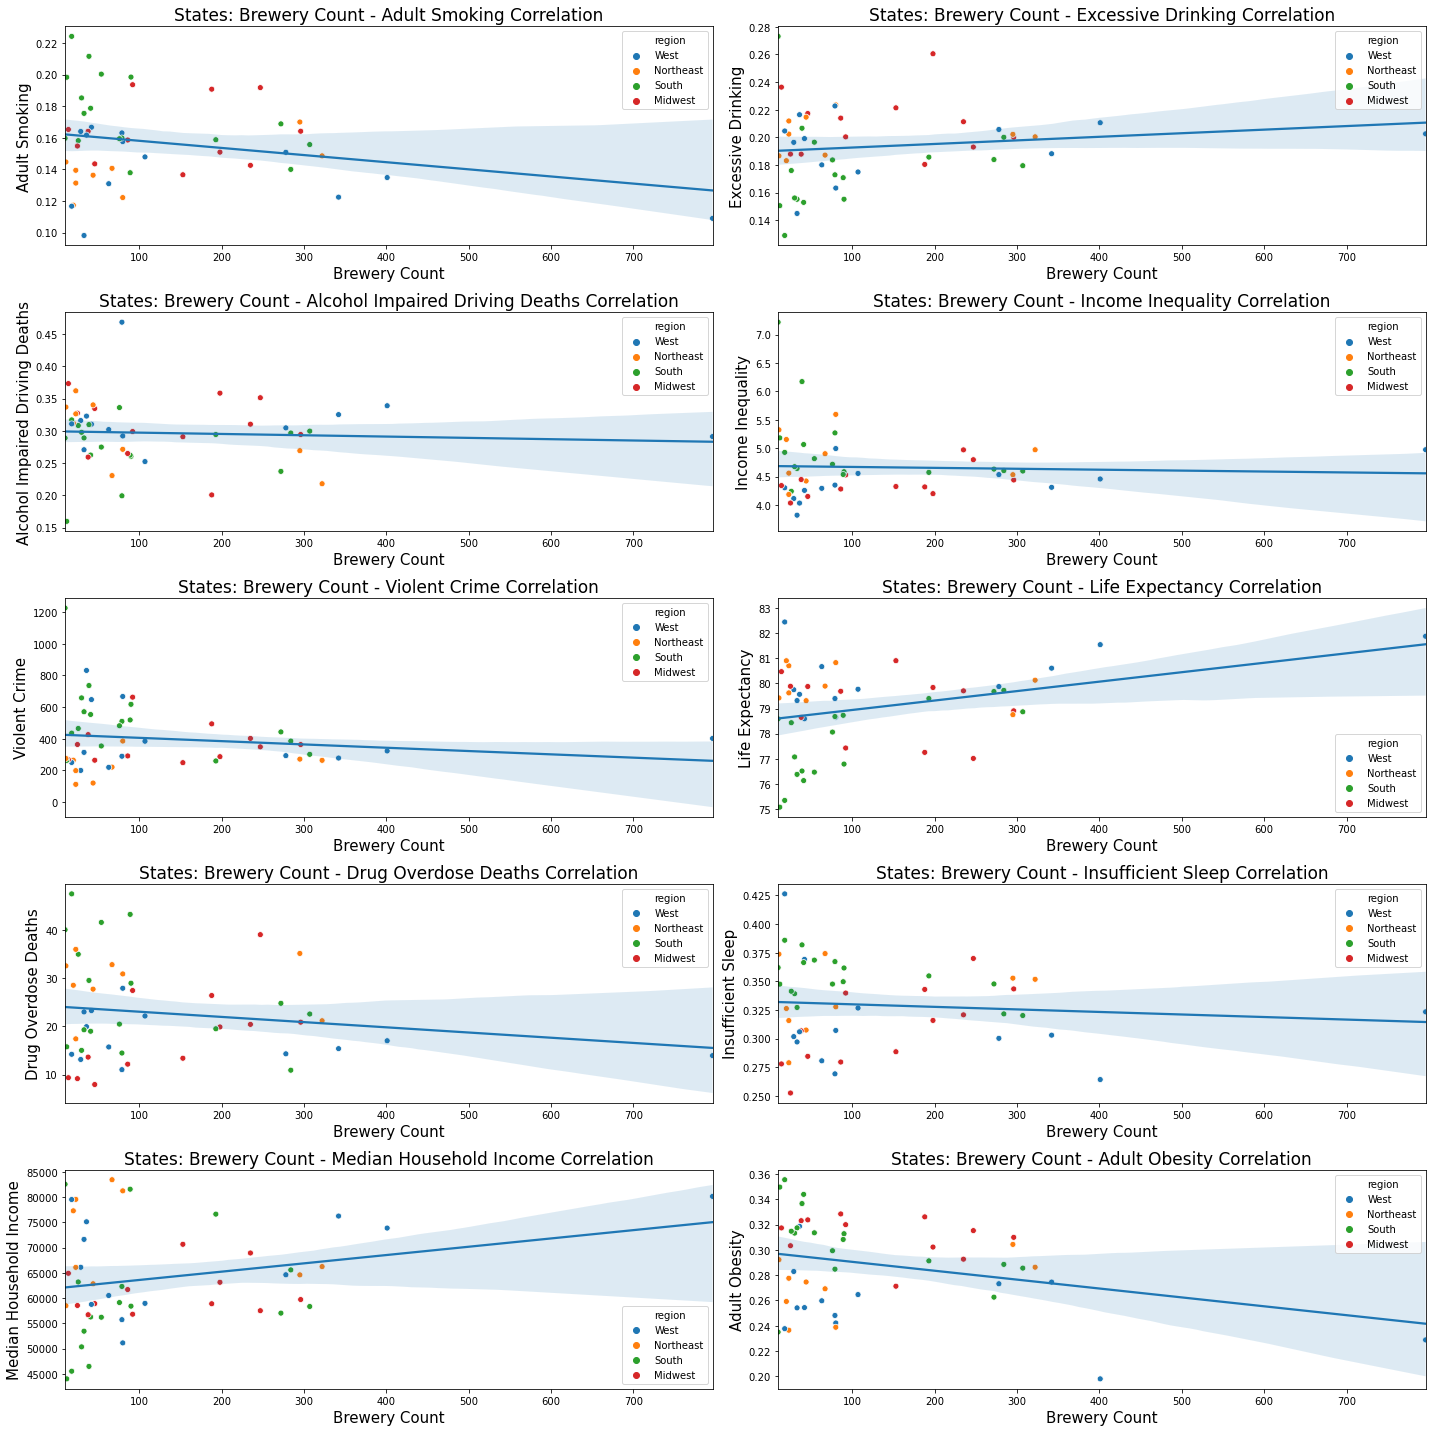

In [87]:
# States
f = plt.figure(figsize=(20, 20))
for index, column in enumerate(comparison_cols):
    axis = f.add_subplot(
        5, 2, index+1, 
#          fc='#FDF6E3'
    )
    sns.scatterplot('brewery_count', column, data=grouped_state, hue='region')
    sns.regplot('brewery_count', column, data=grouped_state, fit_reg=True, marker='')
#     axis.legend(loc='upper right', title='Region')
#     axis.set(xlabel='Brewery Count')
    axis.set_xlabel('Brewery Count',fontsize=15);
    axis.set_ylabel(clean(column),fontsize=15);
    axis.set_title(f'States: Brewery Count - {clean(column)} Correlation', fontsize=17)
    
    plt.tight_layout()
plt.savefig("../data/states_fig.png")
    

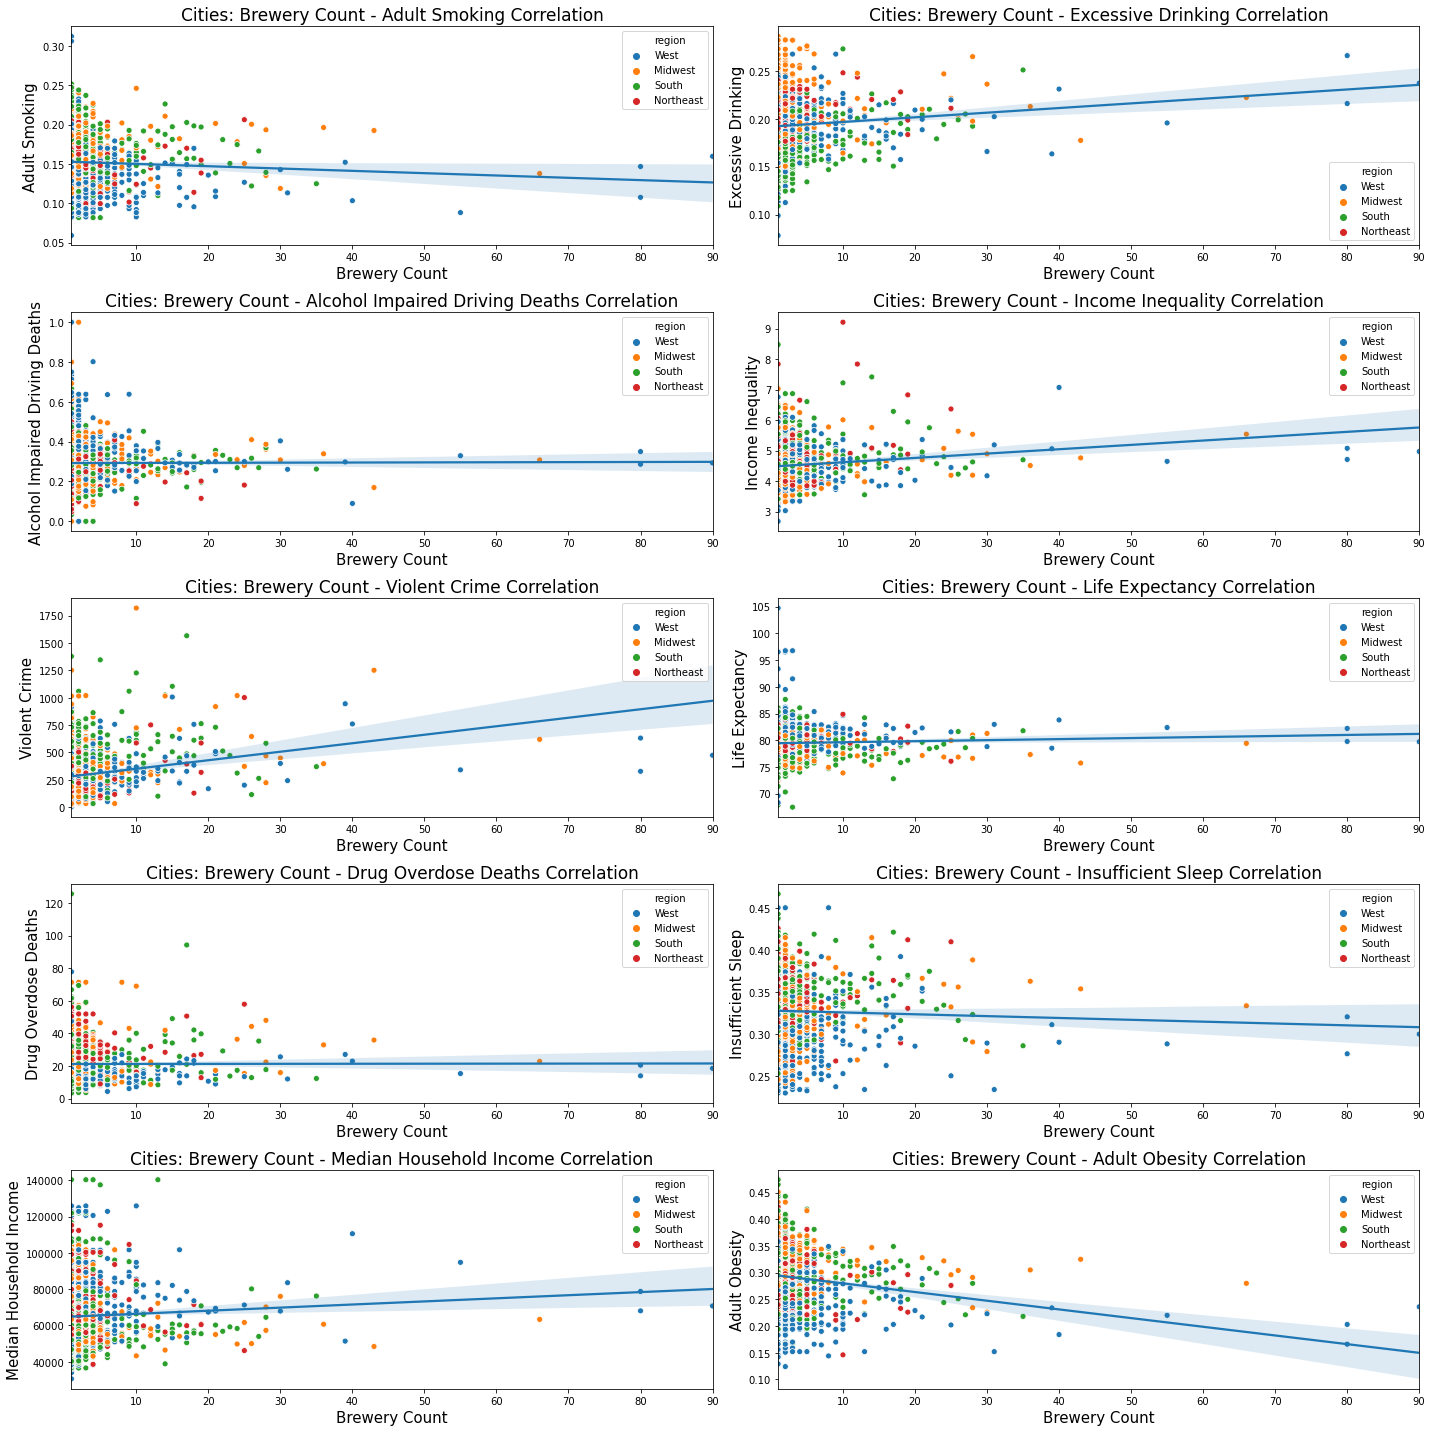

In [102]:
# City analysis
f = plt.figure(figsize=(20, 20))
for index, column in enumerate(comparison_cols):
    axis = f.add_subplot(
        5, 2, index+1, 
#          fc='#FDF6E3'
    )
    sns.scatterplot('brewery_count', column, data=grouped_locality, hue='region')
    sns.regplot('brewery_count', column, data=grouped_locality, fit_reg=True, marker='')
#     axis.legend(loc='upper right', title='Region')
#     axis.set(xlabel='Brewery Count')
    axis.set_xlabel('Brewery Count',fontsize=15);
    axis.set_ylabel(clean(column),fontsize=15);
    axis.set_title(f'Cities: Brewery Count - {clean(column)} Correlation', fontsize=17)
    
    plt.tight_layout()
    
plt.savefig("../data/cities_fig.png")

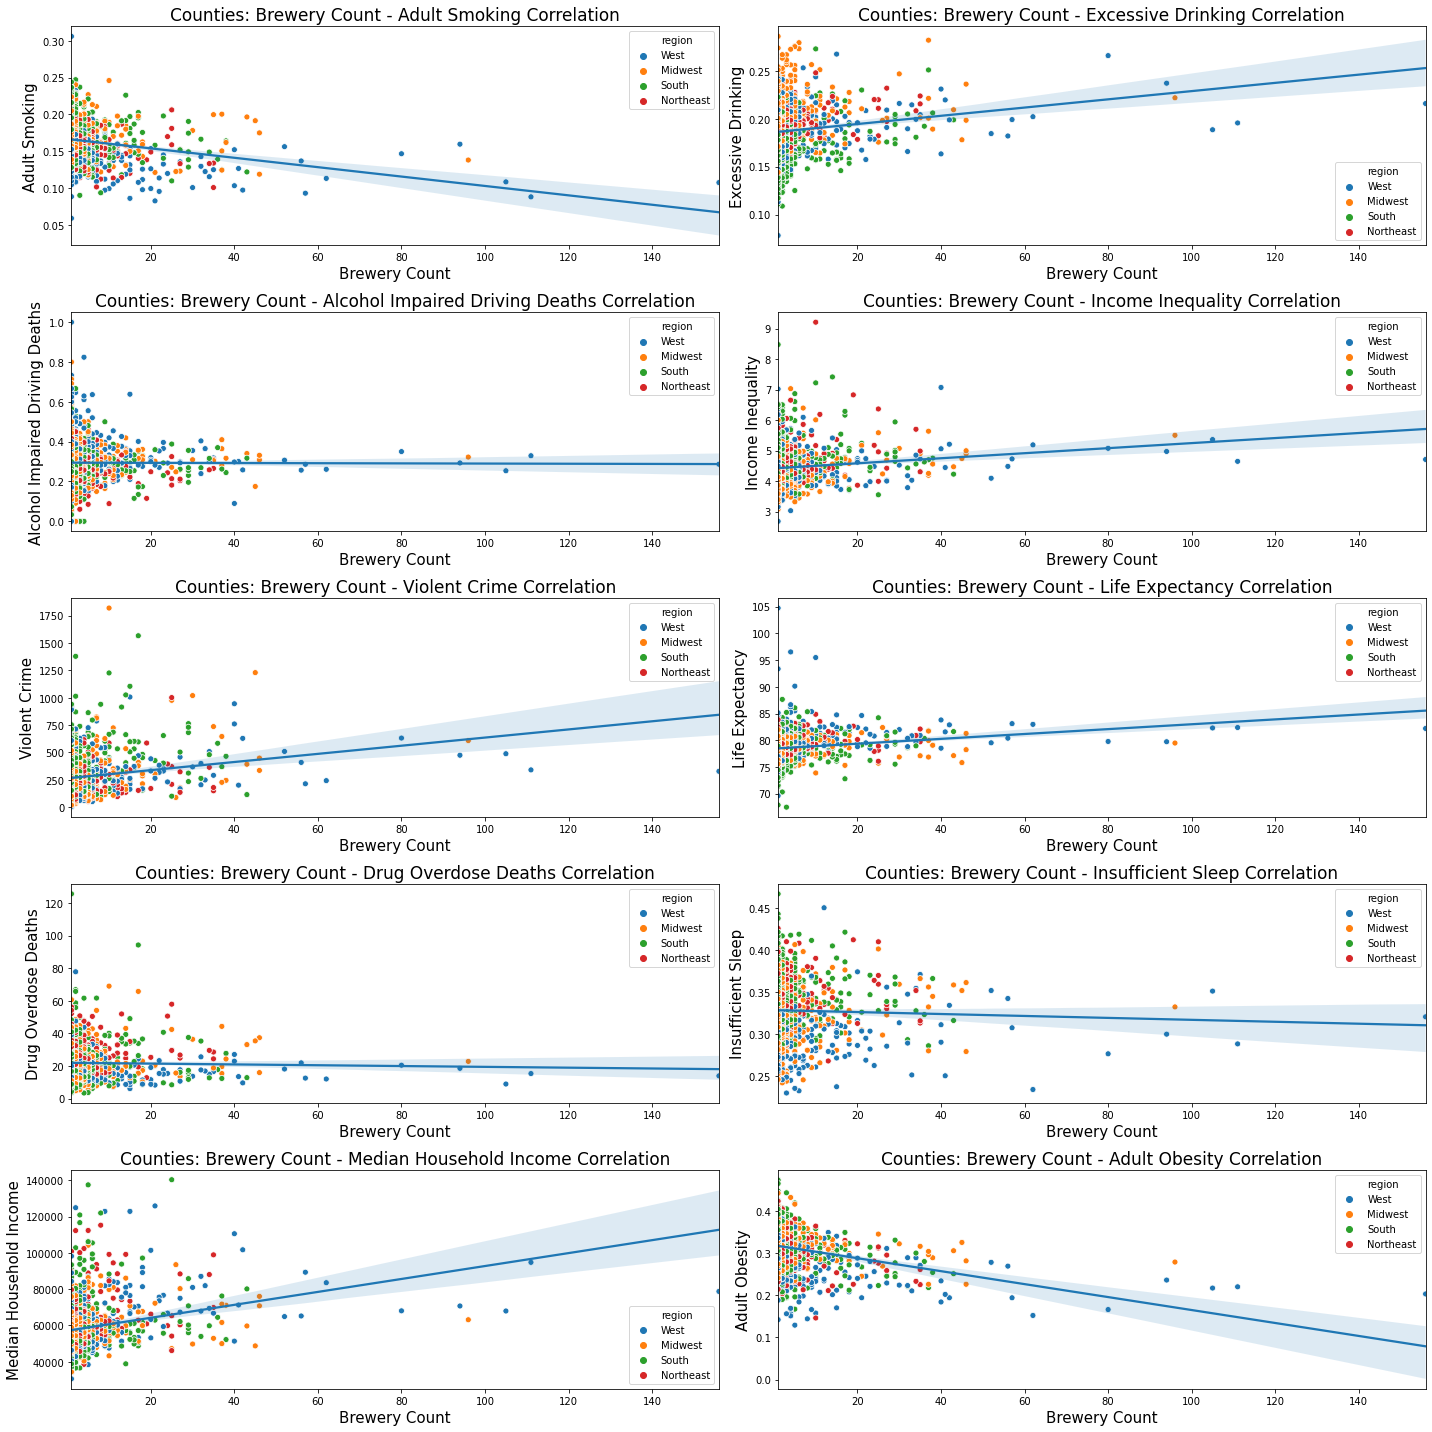

In [103]:
# Counties analysis
f = plt.figure(figsize=(20, 20))
for index, column in enumerate(comparison_cols):
    axis = f.add_subplot(
        5, 2, index+1, 
#          fc='#FDF6E3'
    )
    sns.scatterplot('brewery_count', column, data=grouped_county, hue='region')
    sns.regplot('brewery_count', column, data=grouped_county, fit_reg=True, marker='')
#     axis.legend(loc='upper right', title='Region')
#     axis.set(xlabel='Brewery Count')
    axis.set_xlabel('Brewery Count',fontsize=15);
    axis.set_ylabel(clean(column),fontsize=15);
    axis.set_title(f'Counties: Brewery Count - {clean(column)} Correlation', fontsize=17)
    
    plt.tight_layout()
    
plt.savefig("../data/counties_fig.png")

In [90]:
# grouped_county

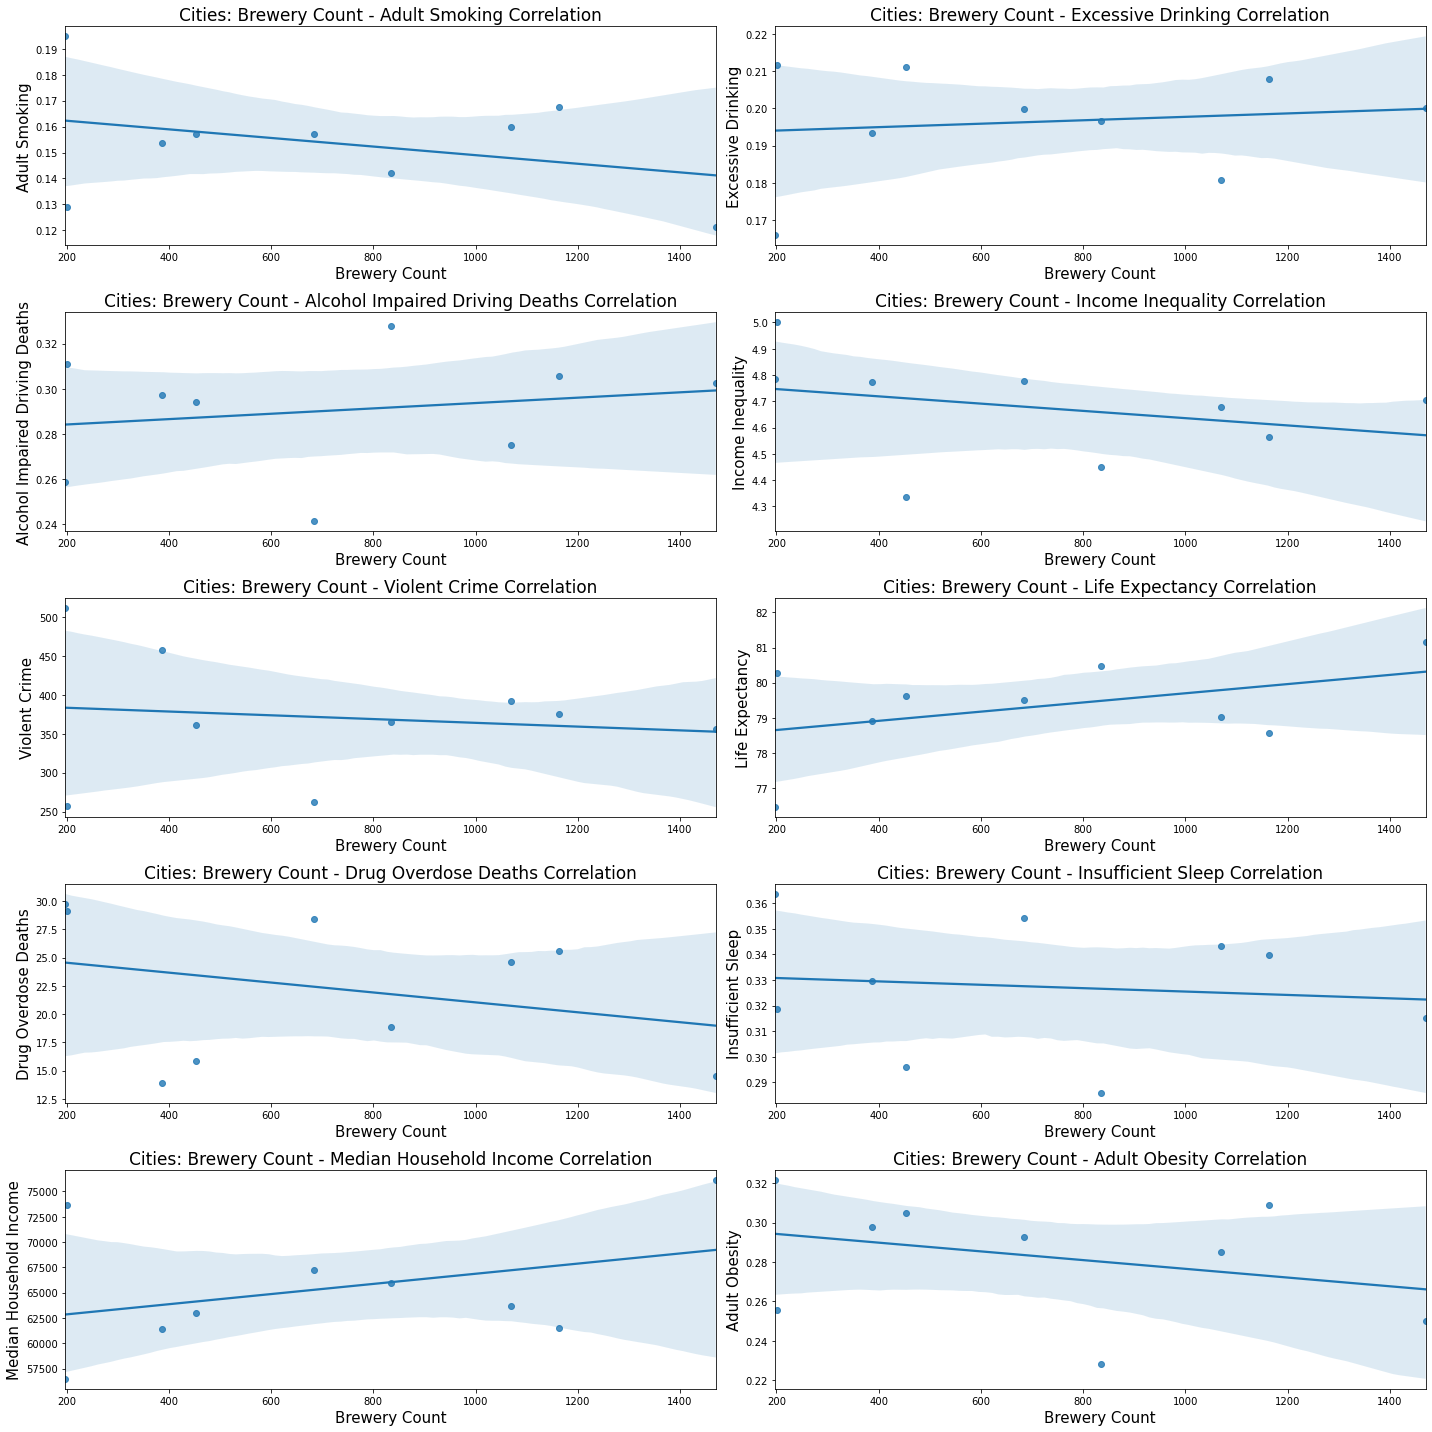

In [91]:
# Division

f = plt.figure(figsize=(20, 20))
for index, column in enumerate(comparison_cols):
    axis = f.add_subplot(
        5, 2, index+1, 
#          fc='#FDF6E3'
    )
    sns.regplot('brewery_count', column, data=grouped_division, fit_reg=True)
#     axis.legend(loc='upper right', title='Region')
#     axis.set(xlabel='Brewery Count')
    axis.set_xlabel('Brewery Count',fontsize=15);
    axis.set_ylabel(clean(column),fontsize=15);
    axis.set_title(f'Cities: Brewery Count - {clean(column)} Correlation', fontsize=17)
    
    plt.tight_layout()

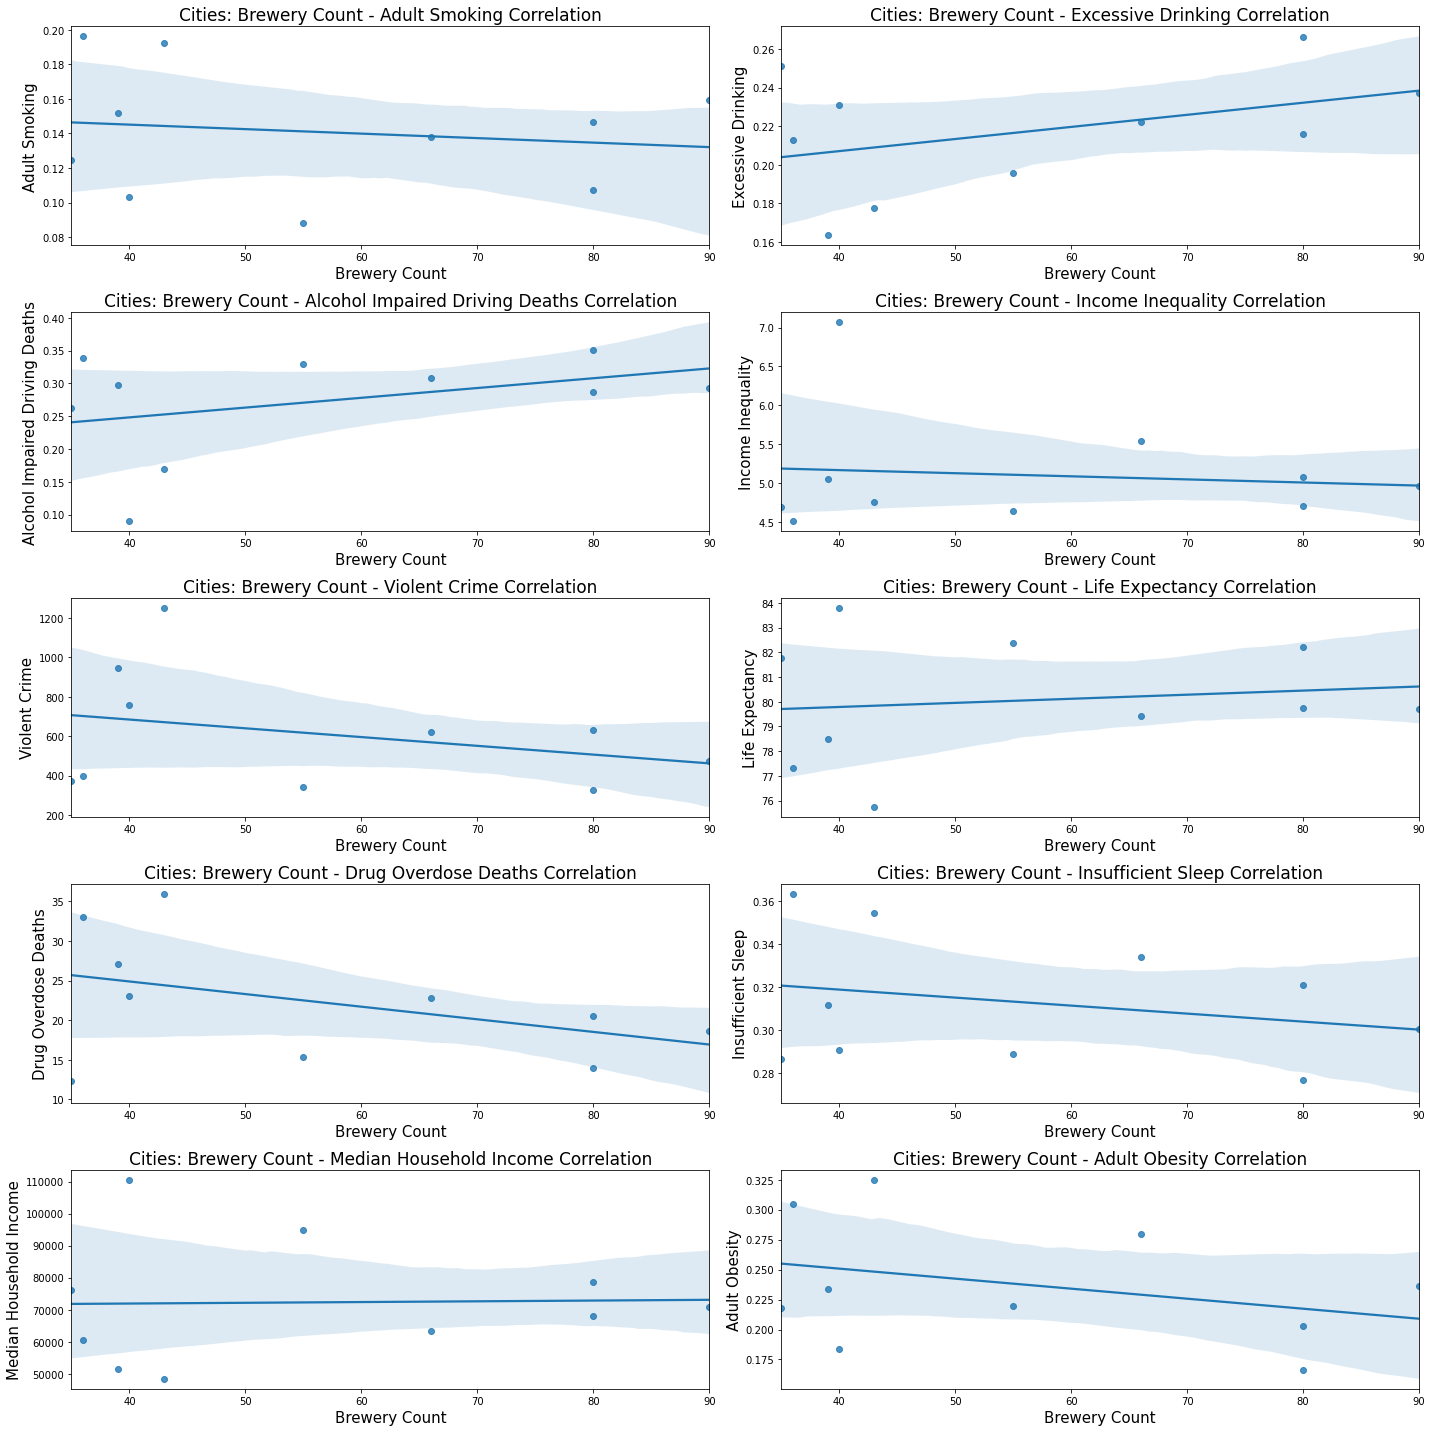

In [92]:
# Top 10 cities
f = plt.figure(figsize=(20, 20))
for index, column in enumerate(comparison_cols):
    axis = f.add_subplot(
        5, 2, index+1, 
#          fc='#FDF6E3'
    )
    sns.regplot('brewery_count', column, data=top_10_cities, fit_reg=True)
#     axis.legend(loc='upper right', title='Region')
#     axis.set(xlabel='Brewery Count')
    axis.set_xlabel('Brewery Count',fontsize=15);
    axis.set_ylabel(clean(column),fontsize=15);
    axis.set_title(f'Cities: Brewery Count - {clean(column)} Correlation', fontsize=17)
    
    plt.tight_layout()

In [93]:
# value=(grouped_state.region)
# grouped_state['color']= np.where( value==True)

In [94]:
grouped_state.head(1)

,state,region,brewery_count,adult_smoking,excessive_drinking,alcohol_impaired_driving_deaths,income_inequality,violent_crime,life_expectancy,drug_overdose_deaths,insufficient_sleep,median_household_income,suicide,some_college,adult_obesity
4,California,West,796,0.10898,0.202564,0.291157,4.97378,402.199281,81.883473,13.94564,0.323369,80127.94598,11.623195,0.676948,0.228783


In [95]:
# sns.regplot('excessive_drinking', 'alcohol_impaired_driving_deaths', data=grouped_state)

In [96]:
# sns.regplot('excessive_drinking', 'alcohol_impaired_driving_deaths', data=grouped_locality)

In [97]:
# sns.regplot('excessive_drinking', 'alcohol_impaired_driving_deaths', data=grouped_county)

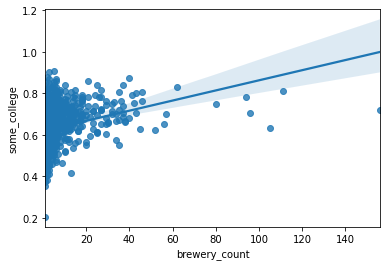

In [98]:
sns.regplot('brewery_count', 'some_college', data=grouped_county)

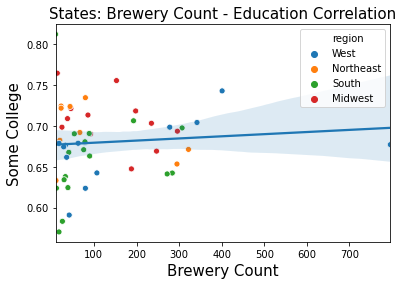

In [107]:
sns.scatterplot('brewery_count', 'some_college', data=grouped_state, hue='region')
sns.regplot('brewery_count', 'some_college', data=grouped_state, fit_reg=True, marker='')
plt.title('States: Brewery Count - Education Correlation', fontsize=15)
plt.xlabel('Brewery Count',fontsize=15);
plt.ylabel(clean('some_college'),fontsize=15);
plt.savefig("../data/states_college.png")

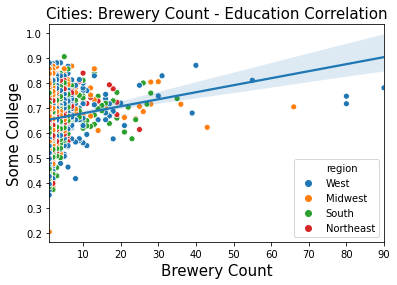

In [108]:
sns.scatterplot('brewery_count', 'some_college', data=grouped_locality, hue='region')
sns.regplot('brewery_count', 'some_college', data=grouped_locality, fit_reg=True, marker='')
plt.title('Cities: Brewery Count - Education Correlation', fontsize=15)
plt.xlabel('Brewery Count',fontsize=15);
plt.ylabel(clean('some_college'),fontsize=15);
plt.savefig("../data/cities_college.png")

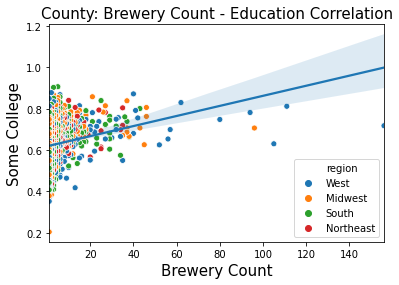

In [109]:
sns.scatterplot('brewery_count', 'some_college', data=grouped_county, hue='region')
sns.regplot('brewery_count', 'some_college', data=grouped_county, fit_reg=True, marker='')
plt.title('County: Brewery Count - Education Correlation', fontsize=15)
plt.xlabel('Brewery Count',fontsize=15);
plt.ylabel(clean('some_college'),fontsize=15);
plt.savefig("../data/counties_college.png")